# Importação das bibliotecas

In [86]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy.stats import norm
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

In [87]:
def obter_resumo(tipo_imovel: str, bairro: str = None, banheiro: int = None, quartos: int = None):
    query = f'  tipo_imovel == "{tipo_imovel}"'
    if bairro is not None:
        query += f' and bairro_teste == "{bairro}"  '
    if banheiro is not None:
        query += f' and banheiro == {banheiro} '
    if quartos is not None:
        query += f' and quarto == {quartos} '
    base_original = pd.read_parquet('../data/processed/base_casa_v2.parquet')
    base_original = base_original.query(query)
    return base_original

In [88]:
def obter_estatistica(base_original : pd.DataFrame):
    print('Média preço: ', round(base_original['preco'].mean(), 2))
    print('Mediana Preço:',  base_original['preco'].median())
    print('Moda: ', base_original['preco'].mode()[0])
    print('Desvio Padrão, ', base_original['preco'].std())

- Preço Geral

In [89]:
base_original = obter_resumo(tipo_imovel='Apartamento')
base_original

,tipo_imovel,nome,preco,metragem,quarto,banheiro,garagem,ID_CASA,bairro_teste
0,Apartamento,"Apartamento com 2 Quartos à Venda, 65m²",310000.00,65,2,2,1,2699716579,Jardim Botânico
2,Apartamento,"Apartamento com 2 Quartos à Venda, 71m²",403500.00,71,2,2,2,2690493538,Bonfim Paulista
3,Apartamento,"Apartamento com 2 Quartos à Venda, 54m²",290000.00,54,2,2,1,2667652105,Nova Aliança
4,Apartamento,"Apartamento com 2 Quartos à Venda, 45m²",166420.00,45,2,1,1,2682840782,Conjunto Habitacional Jardim Das Palmeiras
5,Apartamento,"Apartamento com 2 Quartos à Venda, 64m²",370000.00,64,2,2,2,2688027260,Vila Ana Maria
...,...,...,...,...,...,...,...,...,...
9967,Apartamento,"Apartamento com 3 Quartos à Venda, 81m²",540000.00,81,3,2,2,2696267182,Vila Do Golf
9968,Apartamento,"Apartamento com Quarto à Venda, 61m²",280000.00,61,1,1,1,2476716299,Centro
9969,Apartamento,"Apartamento com 3 Quartos à Venda, 83m²",375000.00,83,3,3,2,2693112449,Jardim São Luiz
9970,Apartamento,"Apartamento com 2 Quartos à Venda, 48m²",175000.00,48,2,1,1,2572455642,Lagoinha


# Teste da normalidade de uma amostra

In [102]:
from scipy.stats import normaltest

In [103]:
base_original_completa = obter_resumo(tipo_imovel='Apartamento')
dados_sumarezinho = base_original_completa.query(
    'bairro_teste == "Sumarezinho"')
dados_centro = base_original_completa.query(
    'bairro_teste == "Centro"')

In [104]:
significancia = 0.05

In [105]:
stat_test, p_valor = normaltest(dados_sumarezinho.preco)

In [106]:
p_valor <= significancia

True

In [107]:
stat_test, p_valor = normaltest(dados_centro.preco)
p_valor <= significancia

True

In [140]:

import warnings
warnings.filterwarnings("ignore")

lista_dados = []
for bairro in base_original['bairro_teste'].unique():
    try:
        dados_sumarezinho = base_original_completa.query(
            f'bairro_teste == "{bairro}"')
        
        stat_test, p_valor = normaltest(dados_sumarezinho.preco)
        lista_dados.append(
            {
                'bairro': bairro,
                'teste_normalidade': p_valor <= significancia,
                'desvio_padrao': dados_sumarezinho['preco'].std()
            }
                
            
        )
    except:
        pass

lista_dados = sorted(lista_dados, key=lambda x: x['desvio_padrao'])
df_teste_normalidade = pd.DataFrame(lista_dados)
df_teste_normalidade.nlargest(10, columns=['desvio_padrao'])

,bairro,teste_normalidade,desvio_padrao
99,Jardim Ilhas Do Sul,True,1752338.48
98,Bonfim Paulista,True,911435.88
97,Jardim Olhos D Agua,True,735905.38
96,Jardim Botânico,True,720996.16
95,Vila Do Golf,True,666626.96
94,Residencial Morro Do Ipê,True,611889.34
93,Jardim Canadá,True,524776.17
92,Bosque Das Juritis,False,443196.05
91,Jardim Santa Angela,False,430756.32
90,Ribeirânia,True,395303.50


# Teste de hipótese

<ul>
    <li>u1: Média dos imóveis do bairro sumarezinho </li>
    <li>u2: Média dos imóveis do bairro Centro </li>
    <li>H0: u1 <= u2</li>
    <li>H1: u1 > u2 XXX</li>
<ul>

In [109]:
significancia = 0.01
confianca = 1 - significancia

In [110]:
from sklearn.model_selection import StratifiedShuffleSplit

In [111]:
base_original_completa = obter_resumo(tipo_imovel='Apartamento')

In [136]:
dados_sumarezinho = base_original_completa.query(
    'bairro_teste == "Sumarezinho"')
dados_centro = base_original_completa.query(
    'bairro_teste == "Centro"')
dados_jardim_macedo = base_original_completa.query(
    'bairro_teste == "Jardim Itaú"')
dados_sao_jose = base_original_completa.query(
    'bairro_teste == "Ribeirao Verde"'
)

In [139]:
dados_sao_jose.shape

(17, 9)

In [113]:
def obter_numero_classe(dataframe: pd.DataFrame):
    n = dataframe.shape[0]


    k = 1 + (10 / 3) * np.log10(n)
    k = int(k.round(0))

    return k

<Axes: xlabel='preco', ylabel='Count'>

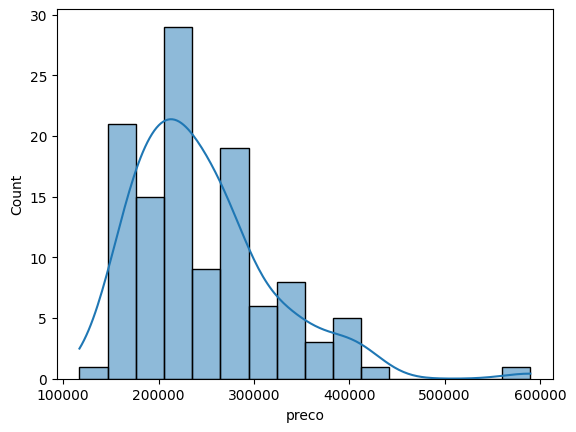

In [114]:

k = obter_numero_classe(dados_sumarezinho)
sns.histplot(data=dados_sumarezinho, x='preco', kde=True)

<Axes: xlabel='preco', ylabel='Count'>

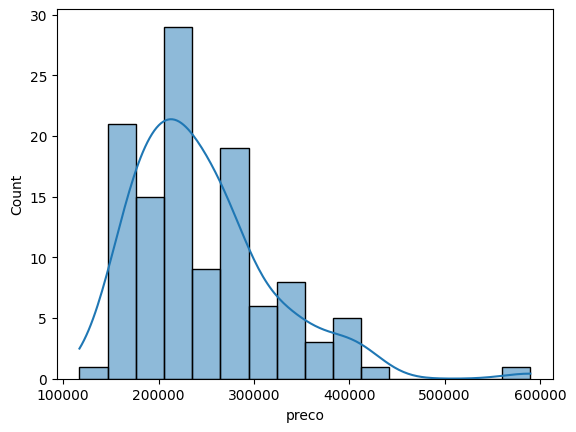

In [115]:
sns.histplot(data=dados_sumarezinho, x='preco', kde=True)

<Axes: xlabel='preco', ylabel='Count'>

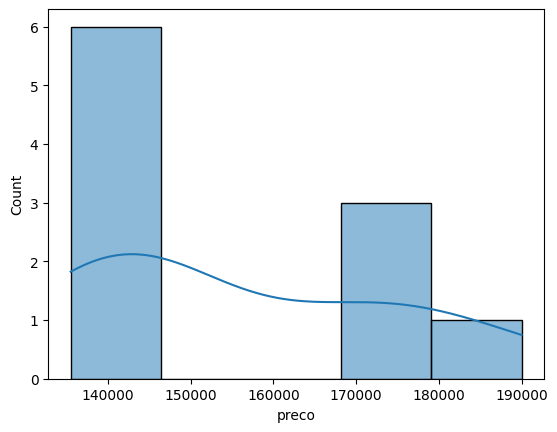

In [116]:
k = obter_numero_classe(dados_jardim_macedo)
sns.histplot(data=dados_jardim_macedo, x='preco', kde=True)

In [117]:
obter_estatistica(dados_jardim_macedo)

Média preço:  155900.0
Mediana Preço: 145500.0
Moda:  140000.0
Desvio Padrão,  19039.14097035076


<Axes: xlabel='preco', ylabel='Count'>

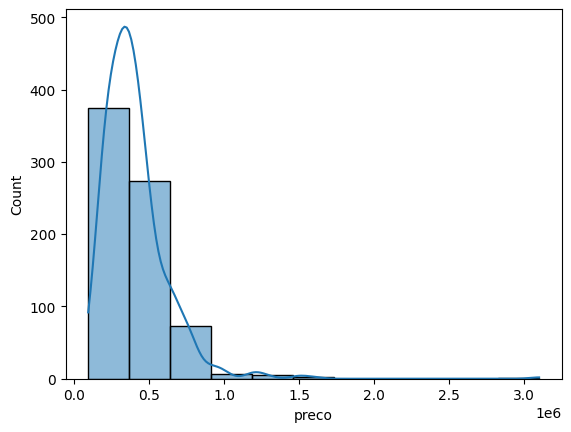

In [118]:

k = obter_numero_classe(dados_centro)
sns.histplot(data=dados_centro, x='preco', bins=k, kde=True)

In [119]:
obter_estatistica(dados_centro)

Média preço:  402076.73
Mediana Preço: 360000.0
Moda:  450000.0
Desvio Padrão,  223344.45525125158


In [120]:
dados_sao_jose

,tipo_imovel,nome,preco,metragem,quarto,banheiro,garagem,ID_CASA,bairro_teste
3699,Apartamento,"Apartamento com 3 Quartos à Venda, 237m²",1750000.00,237,3,6,4,2677632201,Jardim Ilhas Do Sul
3958,Apartamento,"Apartamento com 4 Quartos à Venda, 238m²",2162147.00,238,4,5,4,2568307608,Jardim Ilhas Do Sul
4260,Apartamento,"Apartamento com 3 Quartos à Venda, 132m²",790000.00,132,3,4,2,2651190969,Jardim Ilhas Do Sul
4318,Apartamento,"Apartamento com 4 Quartos à Venda, 376m²",3777000.00,376,4,6,5,2696244782,Jardim Ilhas Do Sul
4714,Apartamento,"Apartamento com 4 Quartos à Venda, 377m²",2989000.00,377,4,7,5,2535780182,Jardim Ilhas Do Sul
4853,Apartamento,"Apartamento com 3 Quartos à Venda, 135m²",1190000.00,135,3,4,2,2659129971,Jardim Ilhas Do Sul
5197,Apartamento,"Apartamento com 3 Quartos à Venda, 238m²",1920000.00,238,3,6,4,2689660719,Jardim Ilhas Do Sul
5502,Apartamento,"Apartamento com 2 Quartos à Venda, 92m²",803823.00,92,2,3,2,2645689185,Jardim Ilhas Do Sul
5969,Apartamento,"Apartamento com 4 Quartos à Venda, 376m²",3000000.00,376,4,6,5,2681062413,Jardim Ilhas Do Sul
6633,Apartamento,"Apartamento com 3 Quartos à Venda, 237m²",1800000.00,237,3,5,4,2684537377,Jardim Ilhas Do Sul


<Axes: xlabel='preco', ylabel='Count'>

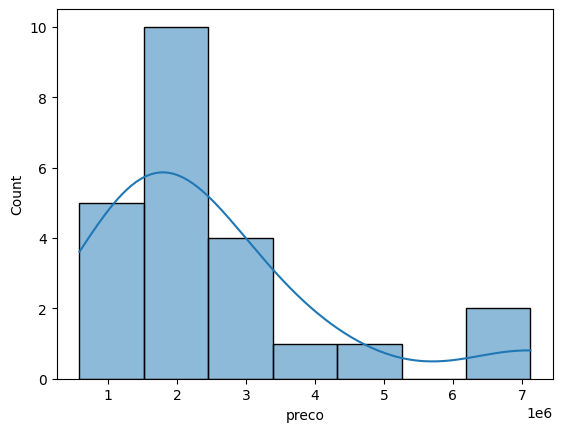

In [121]:
sns.histplot(data=dados_sao_jose, x='preco', kde=True)

In [122]:
obter_estatistica(dados_sao_jose)

Média preço:  2473534.0
Mediana Preço: 1800000.0
Moda:  1750000.0
Desvio Padrão,  1752338.483493155


In [123]:
dados_sumarezinho = base_original_completa.query(
    'bairro_teste == "Sumarezinho"').preco
dados_centro = base_original_completa.query(
    'bairro_teste == "Centro"').preco

In [124]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

In [125]:
test_sumarezinho = DescrStatsW(dados_sumarezinho)
test_centro = DescrStatsW(dados_centro)

In [126]:
test_a = test_sumarezinho.get_compare(test_centro)

In [127]:
test_a.ztest_ind(alternative='larger', value=0)

(-7.546571978952292, 0.9999999999999777)

In [128]:
z, p_valor = test_a.ztest_ind(alternative='larger', value=0)

In [129]:
p_valor <= significancia

False

In [130]:
test_a = CompareMeans(test_centro, test_sumarezinho)

In [131]:
teste_b = CompareMeans(test_centro, test_sumarezinho)

# Teste de shapiro-wilk

In [132]:
from scipy import stats

In [133]:
resultado = stats.shapiro(dados_sumarezinho)
resultado.pvalue

2.5383620915016895e-07

# Intervalo de confiança

In [134]:
import numpy as np
from scipy.stats import t

conf_level = 0.95
media = dados_sao_jose['preco'].mean()
std = dados_sao_jose['preco'].std()
n = dados_sao_jose.shape[0]
grausLiberdade = n - 1
t_value = t.ppf((1 + conf_level) / 2, grausLiberdade)
inf = media - t_value * std / np.sqrt(n)
sup = media + t_value * std / np.sqrt(n)
print('Média:', round(media), ' Desvio padrão:', round(std))
# Imprime o intervalo de confiança para a média
print('Intervalo de confiança:', round(inf), '-', round(sup))

Média: 2473534  Desvio padrão: 1752338
Intervalo de confiança: 1715766 - 3231302
